In [4]:
!pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Loading the data**

In [7]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [8]:
X_test.shape                           #we have 10000 test images

(10000, 32, 32, 3)

In [9]:
y_train.shape                          #we have 50000 train images

(50000, 1)

In [10]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

for classification 1D array is enough so lets convert this to 1D

In [11]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to check

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

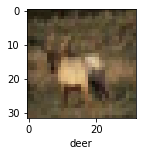

In [15]:
plot_sample(X_train, y_train,3)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

**Normalizing the data **

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
#Build simple artificial neural network for image classification

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(4000, activation='relu'),
        layers.Dense(3000, activation='relu'),
        layers.Dense(2000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 250s 160ms/step - loss: 1.9263 - accuracy: 0.3045
Epoch 2/5
1563/1563 [==============================] - 251s 160ms/step - loss: 1.6318 - accuracy: 0.4244
Epoch 3/5
1563/1563 [==============================] - 251s 161ms/step - loss: 1.5312 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 253s 162ms/step - loss: 1.4556 - accuracy: 0.4828
Epoch 5/5
1563/1563 [==============================] - 253s 162ms/step - loss: 1.4001 - accuracy: 0.5086


we can see at the end of epoch 5 the accuracy is around 50%

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.62      0.54      1000
           1       0.70      0.56      0.62      1000
           2       0.37      0.39      0.38      1000
           3       0.40      0.11      0.18      1000
           4       0.44      0.41      0.42      1000
           5       0.33      0.58      0.42      1000
           6       0.57      0.51      0.54      1000
           7       0.63      0.50      0.56      1000
           8       0.63      0.62      0.62      1000
           9       0.52      0.64      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



In [20]:
#Now let us build a convolutional neural network to train our images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6886 - accuracy: 0.3853
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1168 - accuracy: 0.6082
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9812 - accuracy: 0.6580
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8914 - accuracy: 0.6888
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8275 - accuracy: 0.7119
Epoch 6/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7689 - accuracy: 0.7337
Epoch 7/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7216 - accuracy: 0.7519
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6892 - accuracy: 0.7629
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6404 - accuracy: 0.7777
Epoch 10/10
1563/1563 [==============================] - 52s 33m

With CNN, at the end 5 epochs, accuracy was at around 79.59% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy.
computational speed is also low when compared


In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9546 - accuracy: 0.6910


[0.9545717835426331, 0.6909999847412109]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:7]

array([[1.7337361e-05, 9.8064788e-08, 7.0023988e-03, 8.5831201e-01,
        1.6160983e-03, 1.2324607e-01, 6.8759681e-03, 2.7731430e-05,
        2.8803626e-03, 2.1959408e-05],
       [1.2270482e-02, 1.8808119e-02, 2.1044094e-04, 2.9811030e-05,
        2.5234918e-05, 1.3172411e-06, 8.1270753e-07, 6.5966623e-07,
        9.6711719e-01, 1.5360046e-03],
       [3.3426034e-01, 4.4199079e-02, 3.4987632e-02, 8.2390629e-02,
        2.7434563e-02, 8.6298147e-03, 1.4375285e-02, 5.7363037e-02,
        3.6987925e-01, 2.6480446e-02],
       [9.3257052e-01, 1.9368742e-02, 2.0065974e-03, 7.3413406e-03,
        1.7117333e-02, 1.0124235e-05, 4.3767365e-04, 2.5657762e-04,
        2.0261781e-02, 6.2922639e-04],
       [5.7831166e-06, 1.1018419e-07, 8.7342113e-03, 5.2000843e-03,
        7.3794609e-01, 3.2240353e-03, 2.4488007e-01, 1.4624435e-06,
        8.1551043e-06, 3.9876397e-08],
       [1.0257797e-04, 2.9869304e-06, 1.1820656e-03, 4.8784908e-02,
        3.7862048e-02, 9.7179655e-03, 9.0150243e-01, 7.51

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:7]

[3, 8, 8, 0, 4, 6, 5]

In [27]:
y_test[:7]

array([3, 8, 8, 0, 6, 6, 1], dtype=uint8)

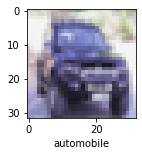

In [31]:
plot_sample(X_test, y_test,9)

In [33]:
classes[y_classes[9]]

'automobile'